# Bringing Better Healthcare to Developing Countries
### Problem Statement 3 - Achieving <b>GOOD HEALTH & WELL-BEING</b> in the World!
--------
### Using Reinforcement Learning (RL) to optimize Dynamic Treatment Regimes (DTRs) for HIV patients in developing countries

By Baby Boss (Xiaoxuan, Voan, Enoch, Rui Bin, Leo)

Dataset can be found [here](https://figshare.com/articles/dataset/The_Health_Gym_v2_0_Synthetic_Antiretroviral_Therapy_ART_for_HIV_Dataset/22827878).

--------

<br>

| Title | Category | Meaning | Comments |
| ----- | -------- | ------- | ------- |
| VL | Patient's Health Status | Viral Load (copies/mL)  |
| CD4 | Patient's Health Status | Absolute Count for CD4 (cells/uL) |
| Rel CD4 | Patient's Health Status | Relative Count for CD4 (cells/uL) |
| Base Drug Combo | HIV Treatments | FTC + TDF <br> 3TC + ABC <br> FTC + TAF <br> DRV + FTC + TDF <br> FTC + RTVB + TDF <br> Other | Class 0 = FTC + TDF<br>Class 1 = 3TC + ABC<br>Class 2 = DRV + FTC + TDF<br>Class 3 = Other<br>Class 4 = FTC + RTVB + TDF<br>Class 5 = FTC + TAF |
| Comp. INI | HIV Treatments | Complimentary INI (Integrase Inhibitor) | Class 0 = Not Applied<br>Class 1 = DTG<br>Class 2 = EVG<br>Class 3 = DTG |
| Comp. NNRTI | HIV Treatments | Complimentary NNRTI (Nucleotide Reverse Transcriptase Inhibitors)| Class 0 = Not Applied<br>Class 1 = RPV<br>Class 2 = EFV<br>Class 3 = NVP |
| Extra PI | HIV Treatments | Extra Protease Inhibitors | Class 0 = Not Applied<br>Class 1 = ATV<br>Class 2 = RTVB<br>Class 3 = RTV<br>Class 4 = LPV<br>Class 5 = DRV |
| Extra pk-En | HIV Treatments | Extra pk-Enhancer | Class 0 = False<br>Class 1 = True |
| VL (M) | Binary Measurement | VL Measured | Class 0 = False<br>Class 1 = True |
| CD4 (M) | Binary Measurement | CD4 Measured | Class 0 = False<br>Class 1 = True |
| Drug (M) | Binary Measurement | Drug Measured | Class 0 = False<br>Class 1 = True |
| PatientID | Patient's Identifier | Patient Identification Number | Range between 0 to 8915 |
| Timestep | Patient's Identifier | Patient's Visit Sorted by Time | Range between 0 to 59 |
| Gender | Patient's Identifier | Male<br>Female | Class 0 = Male<br>Class 1 = Female |
| Ethnic (Ethnicity) | Patient's Identifier | Asian<br>African<br>Caucasian<br>Other | Class 0 = Asian<br>Class 1 = Afro<br>Class 2 = Caucasian<br>Class 3 = Other |


<br>

---------

In [1]:
# Install the required packages
%pip install pandas gym matplotlib numpy scikit-learn

In [3]:
import pandas as pd
import gym
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.model_selection import train_test_split

In [4]:
# Load dataset

original_data = pd.read_csv('HIV_dataset.csv')
original_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,VL,CD4,Rel CD4,Gender,Ethnic,Base Drug Combo,Comp. INI,Comp. NNRTI,Extra PI,Extra pk-En,VL (M),CD4 (M),Drug (M),PatientID,Timestep
0,29.944271,793.45830,30.834505,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,1.0,1.0,0,0
1,29.241980,467.41890,30.355980,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,1
2,28.748991,465.12485,30.405320,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,2
3,28.101835,692.00690,30.248816,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,3
4,28.813837,641.75714,29.944712,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534955,8.633752,4061.17580,38.708908,1.0,4.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,8915,55
534956,112.354550,2626.29880,22.839344,1.0,4.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,8915,56
534957,9.187279,3726.58370,37.175346,1.0,4.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,8915,57
534958,18.690529,2740.06540,29.395905,1.0,4.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,8915,58


In [5]:
# Preprocessing Data

def preprocess_data(dataframe):

    # To index from 0
    dataframe['Gender'] -= 1
    dataframe['Ethnic'] -= 1

    # Identify the columns to be shifted to the end
    columns_to_shift_start = ['PatientID', 'Timestep', 'Gender', 'Ethnic']
    columns_to_shift_end = ['VL', 'CD4', 'Rel CD4']

    # Create a list of columns excluding the ones to be shifted, and put the shifted columns at the end
    other_columns = [col for col in dataframe.columns if col not in columns_to_shift_start and col not in columns_to_shift_end]
    new_order = columns_to_shift_start + other_columns + columns_to_shift_end
    data_reordered = dataframe[new_order]

    return data_reordered

data = preprocess_data(original_data)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PatientID,Timestep,Gender,Ethnic,Base Drug Combo,Comp. INI,Comp. NNRTI,Extra PI,Extra pk-En,VL (M),CD4 (M),Drug (M),VL,CD4,Rel CD4
0,0,0,0.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,1.0,1.0,29.944271,793.45830,30.834505
1,0,1,0.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,29.241980,467.41890,30.355980
2,0,2,0.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,28.748991,465.12485,30.405320
3,0,3,0.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,28.101835,692.00690,30.248816
4,0,4,0.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,28.813837,641.75714,29.944712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534955,8915,55,0.0,3.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,8.633752,4061.17580,38.708908
534956,8915,56,0.0,3.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,112.354550,2626.29880,22.839344
534957,8915,57,0.0,3.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,9.187279,3726.58370,37.175346
534958,8915,58,0.0,3.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,18.690529,2740.06540,29.395905


In [6]:
# Check data distribution

data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PatientID,Timestep,Gender,Ethnic,Base Drug Combo,Comp. INI,Comp. NNRTI,Extra PI,Extra pk-En,VL (M),CD4 (M),Drug (M),VL,CD4,Rel CD4
count,534960.000000,534960.000000,534960.000000,534960.000000,534960.000000,534960.000000,534960.000000,534960.000000,534960.000000,534960.000000,534960.000000,534960.000000,534960.000000,534960.000000,534960.000000
mean,4457.500000,29.500000,0.136945,2.486092,1.021194,2.166691,2.375819,4.180348,0.066876,0.130894,0.155215,0.776847,7041.119417,823.080891,36.352855
std,2573.829889,17.318118,0.343789,0.783357,1.311942,1.257013,0.847216,1.635013,0.249807,0.337285,0.362110,0.416361,18240.801089,1250.245010,30.404427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101498,7.962432,1.871511
25%,2228.750000,14.750000,0.000000,2.000000,0.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,1.000000,10.490656,272.852865,17.461661
50%,4457.500000,29.500000,0.000000,3.000000,1.000000,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,1.000000,38.783188,466.403180,27.733725
75%,6686.250000,44.250000,0.000000,3.000000,1.000000,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,1.000000,778.271910,859.435142,44.152004
max,8915.000000,59.000000,1.000000,3.000000,5.000000,3.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,97566.414000,42475.200000,586.634600


In [7]:
# Check for any missing values

def check_missing_values(data):
    if any(data.isna().any()):
        return "There are missing values in the dataset."
    else:
        return "There are no missing values in the dataset."

print(check_missing_values(data))

There are no missing values in the dataset.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Visualization

In [8]:
class_names = {
    "Gender": {0: "Male", 1: "Female"},
    "Ethnic": {0: "Asian", 1: "Afro", 2: "Caucasian", 3: "Other"},
    "Base Drug Combo": {0: "FTC + TDF", 1: "3TC + ABC", 2: "DRV + FTC + TDF",
                        3: "Other", 4: "FTC + RTVB + TDF", 5: "FTC + TAF"},
    "Comp. INI": {0: "Not Applied", 1: "DTG", 2: "EVG", 3: "DTG"},
    "Comp. NNRTI": {0: "Not Applied", 1: "RPV", 2: "EFV", 3: "NVP"},
    "Extra PI": {0: "Not Applied", 1: "ATV", 2: "RTVB", 3: "RTV", 4: "LPV", 5: "DRV"},
    "Extra pk-En": {0: "False", 1: "True"},
    "VL (M)": {0: "False", 1: "True"},
    "CD4 (M)": {0: "False", 1: "True"},
    "Drug (M)": {0: "False", 1: "True"}
}

def visualize_data(data):
    # Create a list of columns to ignore
    ignore_col = ["VL", "CD4", "Rel CD4", "PatientID", "Timestep"]

    num_cols = len(data.columns) - len(ignore_col)
    num_rows = 2
    fig, axes = plt.subplots(num_rows, int(num_cols / num_rows), figsize=(20, 8))

    axes = axes.flatten()

    subplot_index = 0

    # Iterate over columns and plot pie charts
    for column in data.columns:
        if column in ignore_col:
            continue
        counts = data[column].value_counts()
        # Access the appropriate subplot
        ax = axes[subplot_index] if num_cols > 1 else axes
        labels = [class_names[column][label] for label in counts.index]
        ax.pie(counts, labels=labels, autopct='%1.1f%%')

        ax.set_title(column)
        subplot_index += 1

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


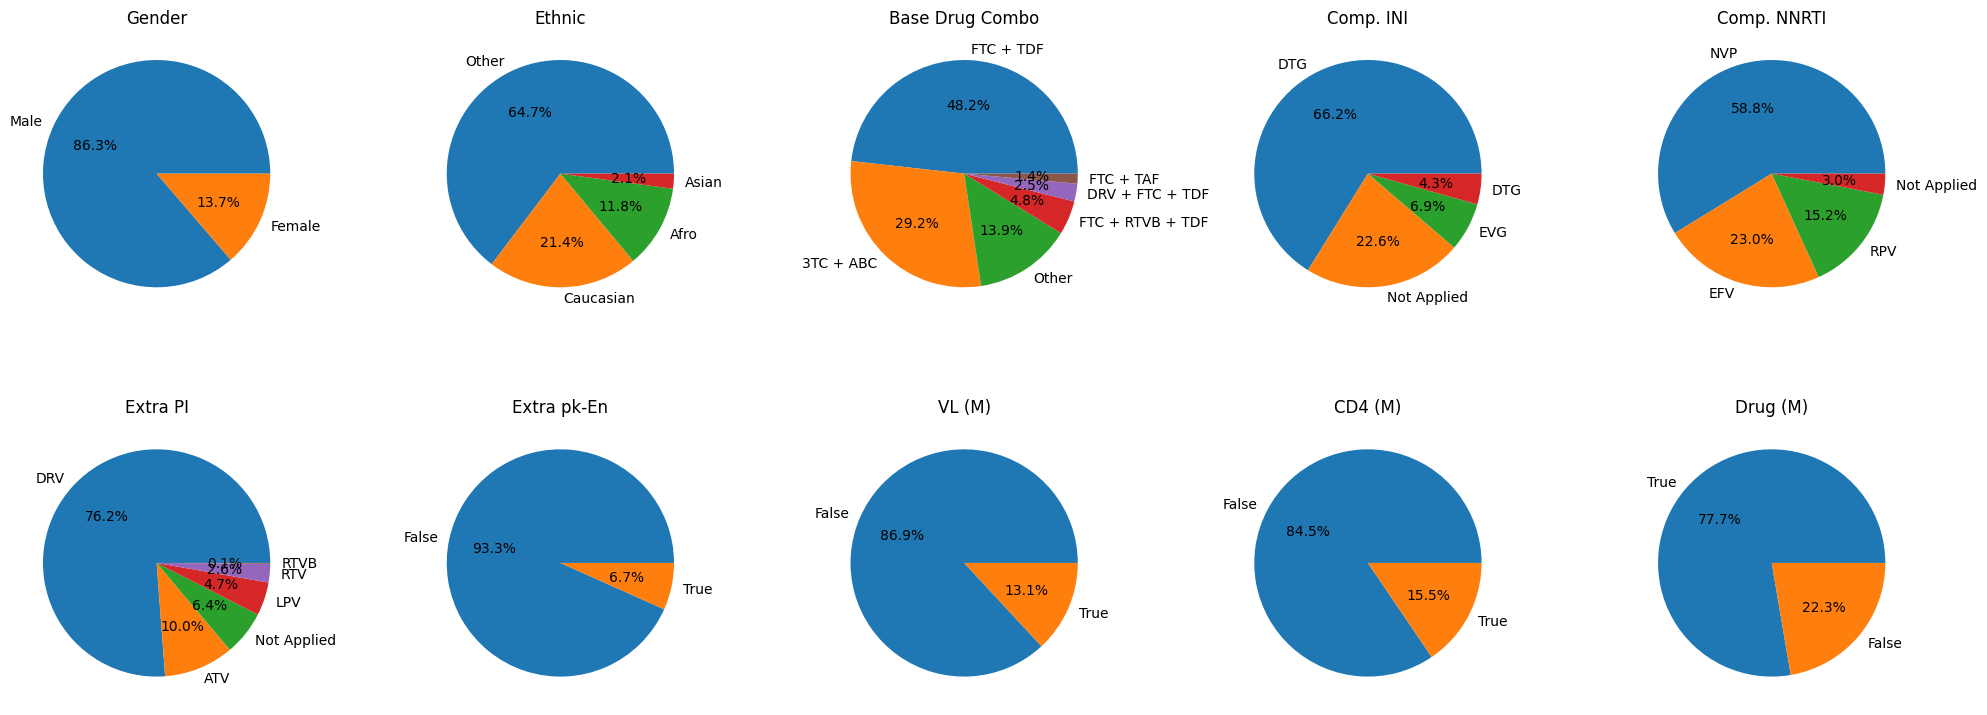

In [9]:
visualize_data(data)

In [10]:
# Plotting Time-Series Functions

def plot_time_series(df, patient_id):
    # Filter DataFrame based on patient_id
    patient_data = df[df['PatientID'] == patient_id]


    # Plot time-series data
    plt.figure(figsize=(10, 6))
    plt.plot(patient_data['Timestep'] + 1, patient_data['VL'], label='VL')
    plt.plot(patient_data['Timestep'] + 1, patient_data['CD4'], label='CD4')
    plt.plot(patient_data['Timestep'] + 1,
             patient_data['Rel CD4'], label='Rel CD4')

    plt.xlabel('Timestep')
    plt.ylabel('Value')
    plt.title(f'Time Series Data for Patient {patient_id}')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_vl(data, patient_id, color="blue"):
    # Filter DataFrame based on patient_id
    patient_data = data[data['PatientID'] == patient_id]

    # Plot VL time-series data
    plt.plot(patient_data['Timestep'], patient_data['VL'],
             label=f'Patient {patient_id}: VL', color=color)

    plt.xlabel('Timestep')
    plt.ylabel('VL Value')
    plt.title(f'VL Time Series Data for Patient {patient_id}')
    plt.grid(True)
    plt.show()


def plot_cd4(data, patient_id, color="orange"):
    # Filter DataFrame based on patient_id
    patient_data = data[data['PatientID'] == patient_id]

    # Plot CD4 time-series data
    plt.plot(patient_data['Timestep'], patient_data['CD4'],
             label=f'Patient {patient_id}: CD4', color=color)

    plt.xlabel('Timestep')
    plt.ylabel('CD4 Value')
    plt.title(f'CD4 Time Series Data for Patient {patient_id}')
    plt.grid(True)
    plt.show()


def plot_rel_cd4(data, patient_id, color="green"):
    # Filter DataFrame based on patient_id
    patient_data = data[data['PatientID'] == patient_id]

    # Plot Rel CD4 time-series data
    plt.plot(patient_data['Timestep'], patient_data['Rel CD4'],
             label=f'Patient {patient_id}: Rel CD4', color=color)

    plt.xlabel('Timestep')
    plt.ylabel('Rel CD4 Value')
    plt.title(f'Rel CD4 Time Series Data for Patient {patient_id}')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


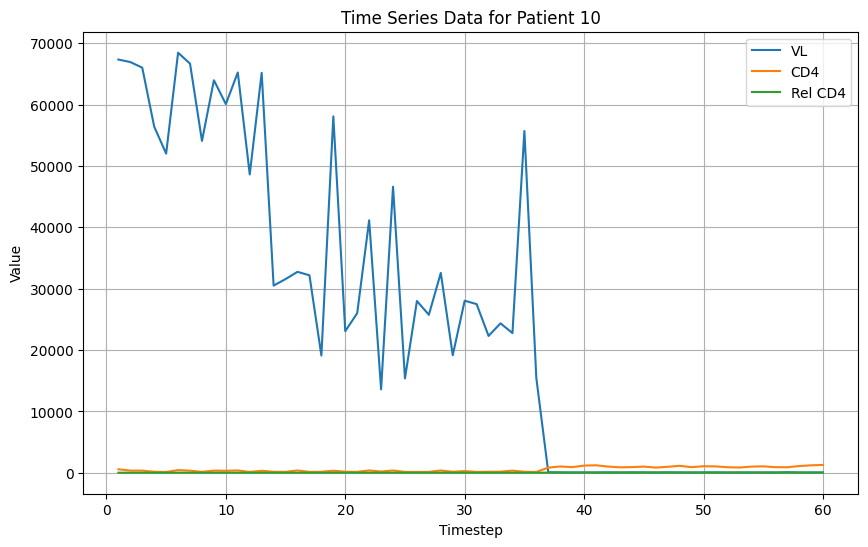

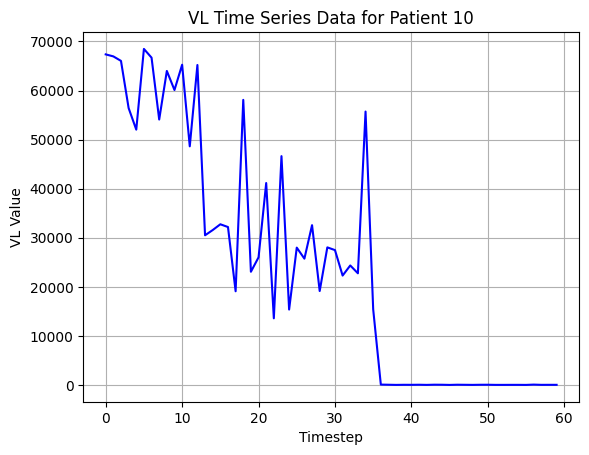

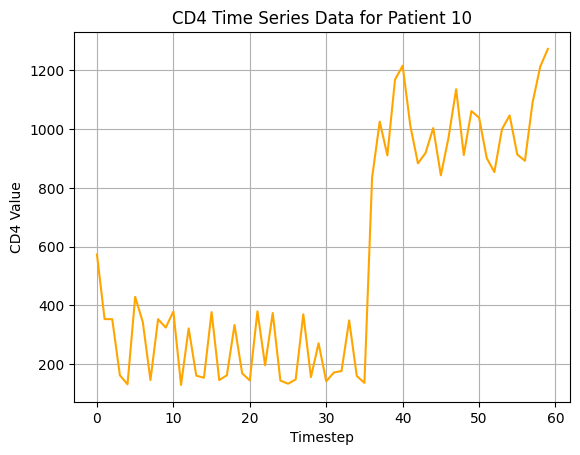

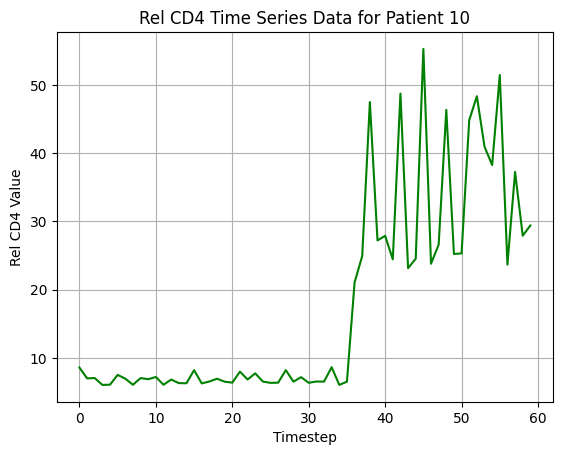

In [11]:
# Plot time-series data for a specific patient
PATIENT_ID = 10
plot_time_series(data, patient_id=PATIENT_ID)
plot_vl(data, patient_id=PATIENT_ID)
plot_cd4(data, patient_id=PATIENT_ID)
plot_rel_cd4(data, patient_id=PATIENT_ID)

## Finding Correlation between VL and CD4

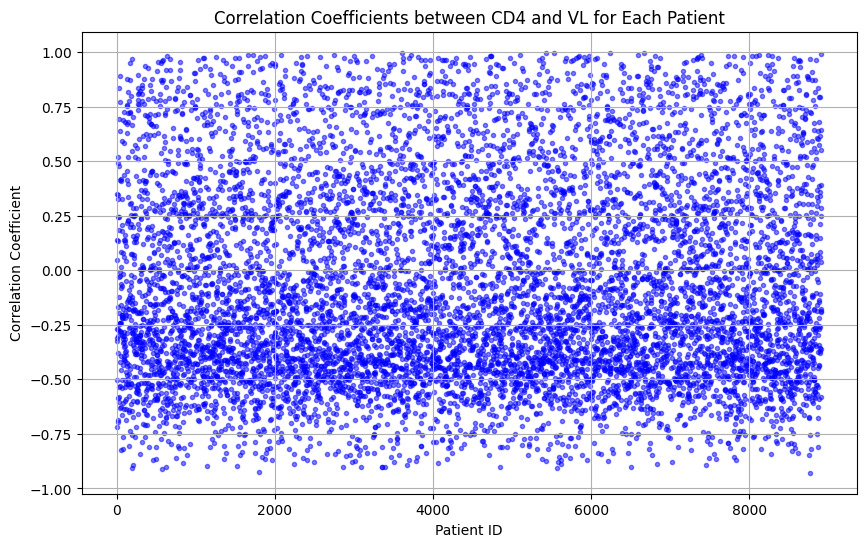

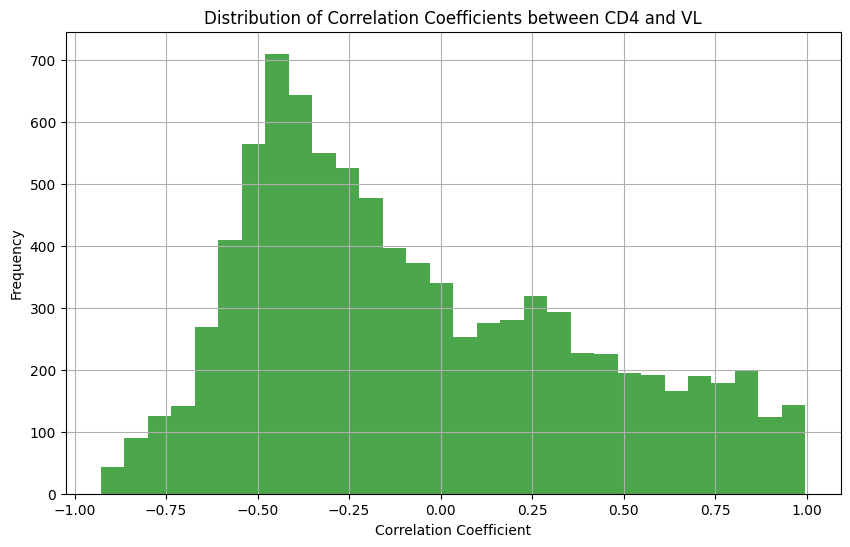

Average correlation coefficient: -0.06283802392524643


In [12]:
# Initialize an empty list to store correlation coefficients
correlation_coefficients = []
start_PATIENT_ID = min(data['PatientID'])
end_PATIENT_ID = max(data['PatientID'])

# Iterate over each patient
for patient_id in range(start_PATIENT_ID, end_PATIENT_ID):
    # Select data for the current patient
    patient_data = data[data['PatientID'] == patient_id]

    # Calculate correlation coefficient between "CD4" and "VL" for the current patient
    correlation = patient_data['CD4'].corr(patient_data['VL'])

    # Append correlation coefficient to the list
    correlation_coefficients.append(correlation)

# Calculate the average correlation coefficient across all patients
average_correlation = sum(correlation_coefficients) / len(correlation_coefficients)

# Plot scatter plot of correlation coefficients for each patient
plt.figure(figsize=(10, 6))
plt.scatter(range(start_PATIENT_ID, end_PATIENT_ID), correlation_coefficients, marker='.', color='b', alpha=0.5)
plt.xlabel('Patient ID')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between CD4 and VL for Each Patient')
plt.grid(True)
plt.show()

# Plot histogram of correlation coefficients across all patients
plt.figure(figsize=(10, 6))
plt.hist(correlation_coefficients, bins=30, color='g', alpha=0.7)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Coefficients between CD4 and VL')
plt.grid(True)
plt.show()

print("Average correlation coefficient:", average_correlation)

## Data Preparation

Using a Train/Validation Split of 80%/20%, the data is split into training data and validation data

In [81]:
episode_length = 60
train_ratio = 0.8
num_episodes = len(data) // episode_length

# Split data into episodes
episodes = [data[i * episode_length: (i + 1) * episode_length] for i in range(num_episodes)]

# Split episodes into training and validation sets
train_episodes = episodes[:int(train_ratio * num_episodes)]
val_episodes = episodes[int(train_ratio * num_episodes):]

train_data = pd.concat(train_episodes)
val_data = pd.concat(val_episodes)

In [82]:
train_data

,PatientID,Timestep,Gender,Ethnic,Base Drug Combo,Comp. INI,Comp. NNRTI,Extra PI,Extra pk-En,VL (M),CD4 (M),Drug (M),VL,CD4,Rel CD4
0,0,0,0.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,1.0,1.0,29.944271,793.45830,30.834505
1,0,1,0.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,29.241980,467.41890,30.355980
2,0,2,0.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,28.748991,465.12485,30.405320
3,0,3,0.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,28.101835,692.00690,30.248816
4,0,4,0.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,28.813837,641.75714,29.944712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427915,7131,55,0.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,9.019238,686.44210,13.084068
427916,7131,56,0.0,3.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,7.337728,157.29823,10.377462
427917,7131,57,0.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,9.002710,672.78780,13.094154
427918,7131,58,0.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,9.058124,427.76205,10.878270


In [83]:
val_data

,PatientID,Timestep,Gender,Ethnic,Base Drug Combo,Comp. INI,Comp. NNRTI,Extra PI,Extra pk-En,VL (M),CD4 (M),Drug (M),VL,CD4,Rel CD4
427920,7132,0,1.0,2.0,1.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,413.160920,6426.67800,58.216522
427921,7132,1,1.0,2.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,1.0,268.867130,783.27600,30.603216
427922,7132,2,1.0,2.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,17.613990,1164.14050,58.497040
427923,7132,3,1.0,2.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,306.085970,986.80646,25.572617
427924,7132,4,1.0,2.0,1.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,54.905506,2403.20750,38.775580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534955,8915,55,0.0,3.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,8.633752,4061.17580,38.708908
534956,8915,56,0.0,3.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,112.354550,2626.29880,22.839344
534957,8915,57,0.0,3.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,9.187279,3726.58370,37.175346
534958,8915,58,0.0,3.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,18.690529,2740.06540,29.395905


## Defining RL Environment and Q-Learning Agent

In [85]:
class Environment:
    def __init__(self, patient_data, num_bins = 10):
        self.patient_data = patient_data
        self.num_bins = num_bins
        self.columns_for_action_space = [
            'Base Drug Combo', 'Comp. INI', 'Comp. NNRTI', 'Extra PI', 'Extra pk-En']
        self.action_space = self.generate_space(self.columns_for_action_space)

        self.columns_for_state_space = [
            'VL', 'CD4', 'Rel CD4']
        self.state_space = self.generate_state_space()

        self.q_table = np.zeros((len(self.state_space), len(self.action_space)))
        self.initial_state_idx = 0  # Assuming initial state index is 0

    def generate_space(self, columns):
        # Get unique values for each column contributing to the space
        unique_values = [list(class_names[col].keys()) for col in columns]
        # Generate all possible combinations of values from these columns
        space = list(product(*unique_values))

        # Create a mapping between each combination and a unique numeric identifier
        mapping = {combination: idx for idx, combination in enumerate(space)}

        # Convert each combination to its corresponding numeric identifier
        self.numeric_identifiers = [mapping[combination] for combination in space]

        # Convert a numeric identifier back to its corresponding combination
        self.reverse_mapping = {idx: combination for combination, idx in mapping.items()}

        return self.numeric_identifiers

    def generate_state_space(self):
        # Discretize continuous variables (VL and CD4)
        vl_bins = np.linspace(self.patient_data['VL'].min(), self.patient_data['VL'].max(), self.num_bins)
        cd4_bins = np.linspace(self.patient_data['CD4'].min(), self.patient_data['CD4'].max(), self.num_bins)
        rel_cd4_bins = np.linspace(self.patient_data['Rel CD4'].min(), self.patient_data['Rel CD4'].max(), self.num_bins)

        # Create state space by combining bin indices
        state_space = list(np.ndindex((self.num_bins,) * 3))
        return state_space

    def step(self, state_idx, action):
        next_state_idx = state_idx
        reward = 0

        virus_count = self.patient_data.iloc[state_idx]['VL']
        white_blood_cells = self.patient_data.iloc[state_idx]['CD4']
        rel_white_blood_cells = self.patient_data.iloc[state_idx]['Rel CD4']
        next_virus_count = max(0, virus_count - action)
        next_white_blood_cells = white_blood_cells + action
        next_rel_white_blood_cells = rel_white_blood_cells + action
        reward = (virus_count - next_virus_count) + (next_white_blood_cells - white_blood_cells) + (next_rel_white_blood_cells - rel_white_blood_cells) # Reward calculation
        return next_state_idx, reward

    def reset(self):
        # Reset the environment to its initial state
        # Return the initial state
        return self.initial_state_idx

In [86]:
class QLearningAgent:
    def __init__(self, state_space, action_space, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.state_space = state_space
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = np.zeros((len(state_space), len(action_space)))

    def choose_action(self, state_idx):
        if np.random.uniform(0, 1) < self.epsilon:
            # Exploration: choose a random action
            print(len(self.action_space))
            return np.random.choice(self.action_space)
        else:
            # Exploitation: choose the action with the highest Q-value
            return np.argmax(self.q_table[state_idx])

    def update_q_table(self, state_idx, action, reward, next_state_idx):
        td_target = reward + self.discount_factor * np.max(self.q_table[next_state_idx])
        td_error = td_target - self.q_table[state_idx, action]
        self.q_table[state_idx, action] += self.learning_rate * td_error

## Training

Train using 80% of the patients (n = 7132)

In [87]:
## Initialize environment and agent
env = Environment(train_data)
agent = QLearningAgent(env.state_space, env.action_space)

In [88]:
# Train agent
total_rewards = []

for episode in range(num_episodes):
    state = env.reset()  # Reset environment to initial state for each episode
    total_reward = 0
    # done = False
    # while not done:
    action = agent.choose_action(state)
    next_state, reward = env.step(state, action)
    agent.update_q_table(state, action, reward, next_state)
    state = next_state
    total_reward += reward
    total_rewards.append(total_reward)
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Streaming output truncated to the last 5000 lines.
Episode 4373: Total Reward = 213.94427100000001
Episode 4374: Total Reward = 213.94427100000001
Episode 4375: Total Reward = 213.94427100000001
Episode 4376: Total Reward = 213.94427100000001
Episode 4377: Total Reward = 213.94427100000001
Episode 4378: Total Reward = 213.94427100000001
Episode 4379: Total Reward = 213.94427100000001
Episode 4380: Total Reward = 213.94427100000001
Episode 4381: Total Reward = 213.94427100000001
Episode 4382: Total Reward = 213.94427100000001
1152
Episode 4383: Total Reward = 1551.9442709999998
Episode 4384: Total Reward = 213.94427100000001
Episode 4385: Total Reward = 213.94427100000001
1152
Episode 4386: Total Reward = 1283.9442709999998
Episode 4387: Total Reward = 213.94427100000001
Episode 4388: Total Reward = 213.94427100000001
Episode 4389: Total Reward = 213.94427100000001
Episode 4390: Total Reward = 213.94427100000001
Episode 4391: Total Reward = 213.94427100000001
Episode 4392: Total Reward 

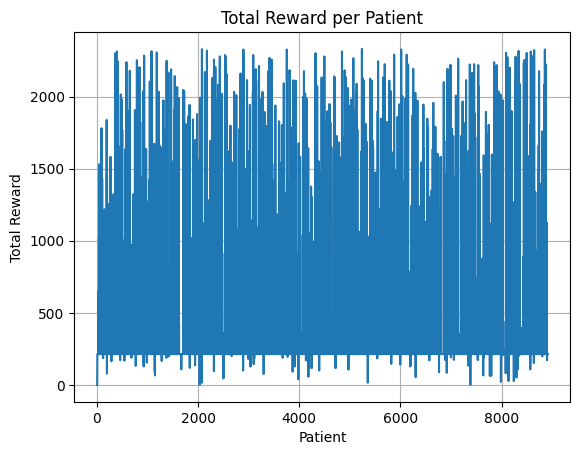

In [90]:
# Plot total rewards
plt.plot(total_rewards)
plt.xlabel('Patient')
plt.ylabel('Total Reward')
plt.title('Total Reward per Patient')
plt.grid(True)
plt.show()

In [ ]:
class MyEnvironment(gym.Env):
    def __init__(self, data, n_actions, n_features):
        super(MyEnvironment, self).__init__()
        # Define your environment here
        self.data = data
        self.state = self.reset()
        self.action_space = gym.spaces.Discrete(n_actions)
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(n_features,))

    def reset(self):
        # Reset environment to initial state
        self.state = self.data.iloc[0, :-1].values  # Initial state is the first row of preprocessed data (excluding the last column)
        return self.state

    def step(self, action):
        # Take action and return next state, reward, done flag, and optional info
        # For simplicity, let's assume the reward is based on the action and the next state
        # Here, we'll return a random reward and next state just for illustration purposes
        next_state = self.data.iloc[np.random.randint(len(self.data)), :-1].values  # Random next state
        reward = np.random.randn()  # Random reward
        done = False  # Episode termination flag (assume it's never done for this example)
        info = {}  # Additional info (optional)
        return next_state, reward, done, info


In [ ]:
# Step 4: Choose and implement RL algorithm (e.g., Q-learning, DQN, etc.)
# For simplicity, let's implement a basic Q-learning algorithm
class QLearningAgent:
    def __init__(self, n_actions, n_features, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.1):
        self.n_actions = n_actions
        self.n_features = n_features
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = exploration_rate
        self.Q_table = np.zeros((n_features, n_actions))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_actions)  # Random action with probability epsilon
        else:
            return np.argmax(self.Q_table[state, :])  # Greedy action with probability (1 - epsilon)

    def learn(self, state, action, reward, next_state):
        q_predict = self.Q_table[state, action]
        q_target = reward + self.gamma * np.max(self.Q_table[next_state, :])
        self.Q_table[state, action] += self.lr * (q_target - q_predict)


In [ ]:
# Step 5: Train RL model
n_actions = 2  # Number of actions
n_features = len(data.columns) - 1  # Number of features (excluding the target column)
agent = QLearningAgent(n_actions, n_features)

env = MyEnvironment(data, n_actions, n_features)
num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.learn(state, action, reward, next_state)
        state = next_state
        total_reward += reward
    print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

In [ ]:
# Step 6: Evaluate and validate RL model (optional)
# For simplicity, let's assume evaluation and validation are not performed in this example

# Step 7: Use RL model to predict new metrics (optional)
# Once the RL model is trained, it can be used to predict actions or outcomes based on new data instances
# For example, you can provide new feature vectors to the model and use its learned policy to predict actions
# Note: Make sure to preprocess new data instances in the same way as the training data

# Example of using the trained RL agent to predict actions for a new state
new_state = np.array([0.5, -0.2, 0.7])  # New state vector (preprocessed)
predicted_action = agent.choose_action(new_state)
print(f"Predicted Action for New State: {predicted_action}")
